# movie데이터

## 데이터 합치기

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
#u.data
columns_name=['user_id','item_id','rating','timestamp']
data = pd.read_csv('/content/drive/MyDrive/ml-100k/u.data', sep='\t',names=columns_name)
print(data.head())
data.shape

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


(100000, 4)

In [11]:
#u.user
columns = ['user_id','age','gender','occupation','zipcode']
user = pd.read_csv('/content/drive/MyDrive/ml-100k/u.user', sep='\|', names=columns)
print(user.head())
user.shape

   user_id  age gender  occupation zipcode
0        1   24      M  technician   85711
1        2   53      F       other   94043
2        3   23      M      writer   32067
3        4   24      M  technician   43537
4        5   33      F       other   15213


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


(943, 5)

In [12]:
#u.data, u.user 합치기
df=pd.merge(data,user,on='user_id')
df

,user_id,item_id,rating,timestamp,age,gender,occupation,zipcode
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105
...,...,...,...,...,...,...,...,...
99995,941,919,5,875048887,20,M,student,97229
99996,941,273,3,875049038,20,M,student,97229
99997,941,1,5,875049144,20,M,student,97229
99998,941,294,4,875048532,20,M,student,97229


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   item_id     100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   timestamp   100000 non-null  int64 
 4   age         100000 non-null  int64 
 5   gender      100000 non-null  object
 6   occupation  100000 non-null  object
 7   zipcode     100000 non-null  object
dtypes: int64(5), object(3)
memory usage: 6.9+ MB


In [21]:
df.drop('zipcode',axis=1,inplace=True)
df

,user_id,item_id,rating,timestamp,age,gender,occupation
0,196,242,3,881250949,49,M,writer
1,196,393,4,881251863,49,M,writer
2,196,381,4,881251728,49,M,writer
3,196,251,3,881251274,49,M,writer
4,196,655,5,881251793,49,M,writer
...,...,...,...,...,...,...,...
99995,941,919,5,875048887,20,M,student
99996,941,273,3,875049038,20,M,student
99997,941,1,5,875049144,20,M,student
99998,941,294,4,875048532,20,M,student


In [22]:
df.to_csv('user_data.csv')

## 데이터 시각화
> sns 시각화

> https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html




In [66]:
sns.set_palette('Set3')

### user 직업

In [80]:
# user 직업 분포
user['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

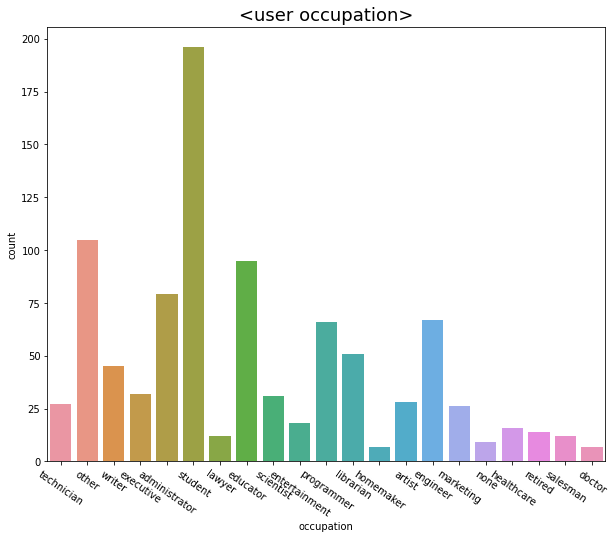

In [67]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=-35)
sns.countplot(x='occupation',data=user)
plt.title('<user occupation>',size=18)
plt.show

### user 성별

In [26]:
# user 성별 남자 약 71%, 여자 약 29%
user['gender'].value_counts(normalize=True)

M    0.710498
F    0.289502
Name: gender, dtype: float64

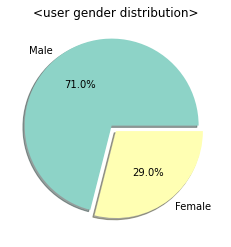

In [57]:
plt.pie(user['gender'].value_counts(),labels=['Male','Female'],autopct='%.1f%%',
        explode=[0.08,0],shadow=True)
plt.title('<user gender distribution>')
plt.show()

### 유저 age

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '<user age distribution>')

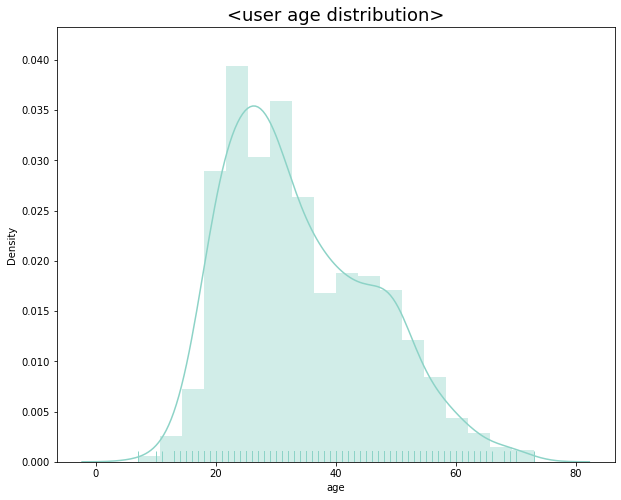

In [56]:
# user age
# sns.kdeplot(user['age'])
plt.figure(figsize=(10,8))
sns.distplot(user['age'],kde=True, rug=True)
plt.title('<user age distribution>',size=18)

### 점수 비율

In [69]:
data['rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

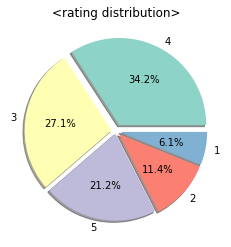

In [79]:
plt.pie(data['rating'].value_counts(),labels=['4','3','5','2','1'],autopct='%.1f%%',
        explode=[0.08,0.05,0.03,0.05,0.05],shadow=True)
plt.title('<rating distribution>')
plt.show()